In [113]:
from PIL import Image #Görsellerle alakalı işlemler için kullanır.
import numpy as np #Numerik işlemler için kütüphane
import sys      #Sistem dosya erişimi ve csv dosya işlemleri için kullanılan kütüphane
import os       #Sistem dosya erişimi ve csv dosya işlemleri için kullanılan kütüphane
import csv      #Sistem dosya erişimi ve csv dosya işlemleri için kullanılan kütüphane
import matplotlib.pyplot as plt #Görsel grafikler için kütüphane
import pandas as pd #Veri bazlı işlemler için kütüphane
import glob #Dosya yolu işlemleri için kullanılır.

In [ ]:
#Görsellerin olduğu dosya dizini
os.chdir("C:/Users/abdullahfurkan/Desktop/foto/9/")#Görsellerin olduğu dosya dizini
myFileList =[]
#Klasör içerisindeki dosya yollarının alınıp diziye atanması
for root, dirs, files in os.walk(".", topdown = False):
   for name in files:
      myFileList.append("C:\\Users\\abdullahfurkan\\Desktop\\foto\\9\\"+(os.path.join(name))) 
   for name in dirs:
      myFileList.append(os.path.join(root, name))

In [ ]:
#Dosyaların etiketleriyle beraber rakama ait csv dosyasına yazılması
for file in myFileList:
    img_file = Image.open(file)
    img_grey = img_file.convert('L')
    value = np.asarray(img_grey.getdata(), dtype=int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    value = np.insert(value,(0,), 9) #Label etiketi tanımlama kısmı (rakam bilgisi = 0 , 1 ,2 ,........)
    with open("C:/Users/abdullahfurkan/Desktop/foto/yeni_test_verisi_dokuz.csv",'a+',newline ='') as f:
        writer = csv.writer(f)
        writer.writerow(value)
    
    
    

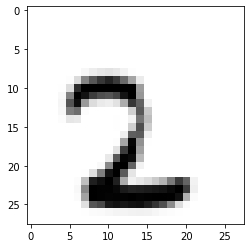

In [133]:
#Bu adımda csvden çekilen herhangi bir rakam verisinin doğruluğunu kontrol etmek için gösterimi var.
X=[]
X = pd.read_csv("C:/Users/abdullahfurkan/Desktop/foto/tum_csvler/yeni_test_verisi_iki.csv",skiprows=8,nrows=1)
fr = pd.DataFrame(X)
fr.drop(fr.columns[[0]], axis=1,inplace=True)#785 PİXELİN LABELİNİ SİLER.
st=fr.to_numpy() #DATAFRAME RESHAPE DESTEKLEMİYOR BU SEBEPLE NUMPY'A ÇEVİRİYORUZ.
st=st.reshape((28, 28)) #DATAFREAME NUMPYA ÇEVRİLDİKTEN SONRA 2 BOYUTLU(28*28) HALE GETİRİLİYOR

plt.imshow(st, cmap="Greys") #GRİ SKALA ÇEVİRİMİ VE PLT PAKETİ ÇEVRİMİ UYGULANIYOR
plt.show() #GÖRSELİ EKRANDA GÖSTERME.



In [143]:
#Rakam bazlı olarak csv dosyalarına aktarılan veriler tek bir csv doyasında bir araya getiriliyor.
path = "C:/Users/abdullahfurkan/Desktop/foto/tum_csvler/"

master_df = pd.DataFrame()

for file in os.listdir(os.getcwd()):
    if file.endswith('.csv'): #Csv dosyalarının belirlenmesi
        master_df = master_df.append(pd.read_csv(file))#Csv dosyalarının birbiri üzerine eklenmesi
master_df.to_csv('mnist_test_yeni.csv',index=False) #Çıktı dosyası